# 常微分方程的解析解和数值解


In [1]:
import sympy as sp

x, y = sp.symbols("x, y")
f = x**2 + 2 * x + 1
integral_f = sp.integrate(f, x)
integral_f

x**3/3 + x**2 + x

In [41]:
f = 1 / (x**2 + y)
integral_f = sp.integrate(f, x)
integral_f

-sqrt(-1/y)*log(x - y*sqrt(-1/y))/2 + sqrt(-1/y)*log(x + y*sqrt(-1/y))/2

In [42]:
a = sp.symbols("a", positive=True)
sp.integrate(1 / (x**2 + a), x)

atan(x/sqrt(a))/sqrt(a)

In [43]:
a, b, c = sp.symbols("a, b, c")
eq = sp.Eq(a * x**2 + b * x + c, 0)
sp.solveset(eq, x)

{-b/(2*a) - sqrt(-4*a*c + b**2)/(2*a), -b/(2*a) + sqrt(-4*a*c + b**2)/(2*a)}

In [44]:
x = sp.symbols("x")
f = sp.symbols("f", cls=sp.Function)
f = lambda x: x**2 + sp.sin(x) + sp.exp(x**2)
f(x).diff(x)

2*x*exp(x**2) + 2*x + cos(x)

In [45]:
y = sp.symbols("y")
f = x**2 + sp.sin(y)
f.diff(x)
f.diff(y)

cos(y)

In [2]:
from scipy.optimize import fsolve, root
from scipy.integrate import quad, dblquad
from math import cos, sin, exp, e, pi


def f(ax):
    x, y, theta = ax[0], ax[1], ax[2]
    return [
        (x + 3 * cos(theta) - 5) ** 2 + (y + 3 * sin(theta)) ** 2 - 25,
        x**2 + y**2 - 25,
        (x + 3 * cos(pi / 3 + theta)) ** 2 + (y + 3 * sin(pi / 3 + theta) - 6) ** 2 - 9,
    ]


result = root(f, [-1.37, 4.80, 0.12])
result

 message: The solution converged.
 success: True
  status: 1
     fun: [-2.005e-10 -1.399e-10 -4.021e-10]
       x: [ 1.158e+00  4.864e+00  2.143e-02]
  method: hybr
    nfev: 16
    fjac: [[-6.692e-01  3.392e-01  6.612e-01]
           [-6.187e-01 -7.471e-01 -2.429e-01]
           [-4.115e-01  5.717e-01 -7.098e-01]]
       r: [ 4.348e+00 -1.624e+00 -1.964e+01 -1.328e+01 -2.833e+01
           -1.615e+01]
     qtf: [ 3.054e-08 -4.885e-08 -4.575e-08]

In [47]:
def func(x, n, k):
    return x * n**k


quad(func, 0, 2, args=(2, 2))

(8.0, 8.881784197001252e-14)

In [48]:
def func(x, y):
    return 3 * (x**2) * (y**2)


def y_area(x):
    return 1 - x**2


dblquad(func, 0, 2, gfun=0, hfun=y_area)

(-18.56507936507937, 1.1732427938881236e-12)

In [49]:
y = sp.symbols("y", cls=sp.Function)
x = sp.symbols("x")
eq = sp.Eq(y(x).diff(x, 2) + 2 * y(x).diff(x, 1) + y(x), x * x)
sp.dsolve(eq, y(x))

Eq(y(x), x**2 - 4*x + (C1 + C2*x)*exp(-x) + 6)

$$
\begin{cases}
\dfrac{dx_1}{dt} = 2x_1 - 3x_2 + 3x_3,\ x_1(0) = 1 \\
\dfrac{dx_2}{dt} = 4x_1 - 5x_2 + 3x_3,\ x_2(0) = 2 \\
\dfrac{dx_3}{dt} = 4x_1 - 4x_2 + 2x_3,\ x_3(0) = 3
\end{cases}

In [4]:
t = sp.symbols("t")
x1, x2, x3 = sp.symbols("x1, x2, x3", cls=sp.Function)
eq1 = sp.Eq(x1(t).diff(t), 2 * x1(t) - 3 * x2(t) + 3 * x3(t))
eq2 = sp.Eq(x2(t).diff(t), 4 * x1(t) - 5 * x2(t) + 3 * x3(t))
eq3 = sp.Eq(x3(t).diff(t), 4 * x1(t) - 4 * x2(t) + 2 * x3(t))
con = {x1(0): 1, x2(0): 2, x3(0): 3}
s = sp.dsolve([eq1, eq2, eq3], ics=con)
s

[Eq(x1(t), 2*exp(2*t) - exp(-t)),
 Eq(x2(t), 2*exp(2*t) - exp(-t) + exp(-2*t)),
 Eq(x3(t), 2*exp(2*t) + exp(-2*t))]

In [9]:
t = sp.Symbol("t")
x1, x2, x3 = sp.symbols("x1, x2, x3", cls=sp.Function)
X = sp.Matrix([x1(t), x2(t), x3(t)])
A = sp.Matrix([[2, -3, 3], [4, -5, 3], [4, -4, 2]])
eq = X.diff(t) - A * X
s = sp.dsolve(eq, ics=con)
s

[Eq(x1(t), 2*exp(2*t) - exp(-t)),
 Eq(x2(t), 2*exp(2*t) - exp(-t) + exp(-2*t)),
 Eq(x3(t), 2*exp(2*t) + exp(-2*t))]

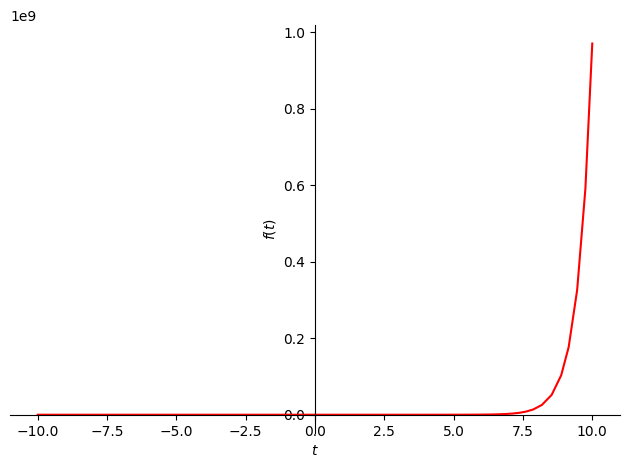

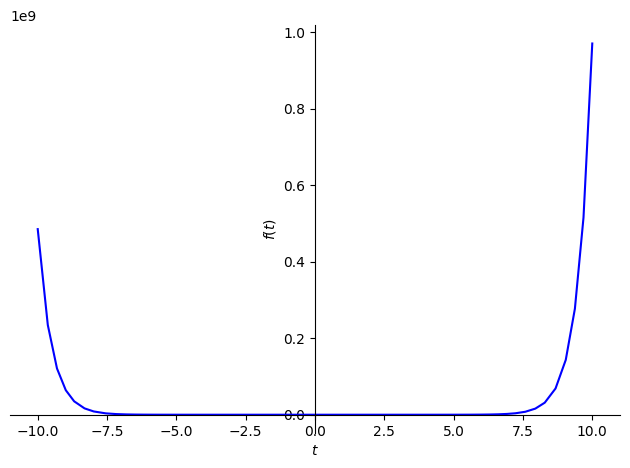

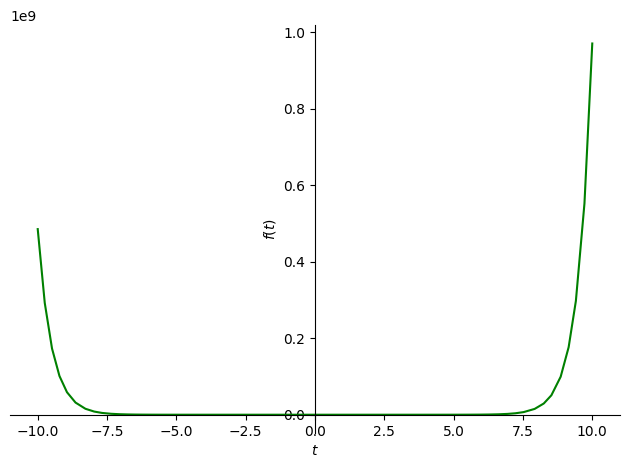

In [10]:
from sympy.plotting import plot

t = sp.Symbol("t")
plot(2 * sp.exp(2 * t) - sp.exp(-t), line_color="red")
plot(2 * sp.exp(2 * t) - sp.exp(-t) + sp.exp(-2 * t), line_color="blue")
plot(2 * sp.exp(2 * t) + sp.exp(-2 * t), line_color="green")

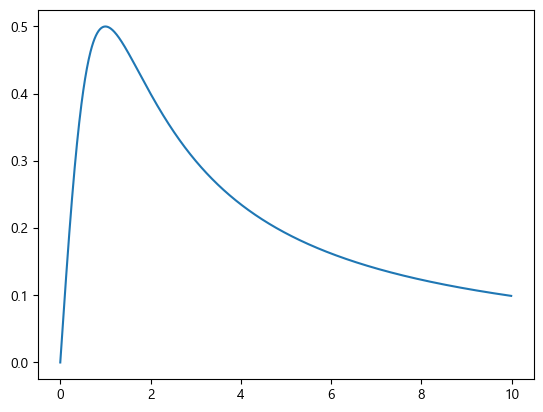

In [53]:
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import numpy as np

dy = lambda y, x: 1 / (x**2 + 1) - 2 * y**2
x = np.arange(0, 10, 0.01)
sol = odeint(dy, 0, x)
plt.plot(x, sol)

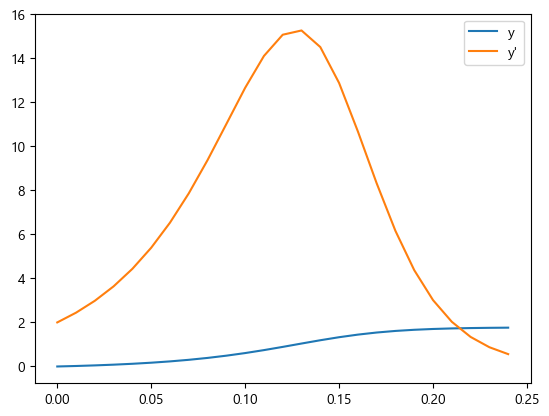

In [54]:
def fvdp(y, t):
    dy1 = y[1]
    dy2 = 20 * (1 - y[0] ** 2) * y[1] - y[0]
    return [dy1, dy2]


def solution():
    x = np.arange(0, 0.25, 0.01)
    y0 = [0, 2]
    y = odeint(fvdp, y0, x)

    (y1,) = plt.plot(x, y[:, 0], label="y")
    (y1_1,) = plt.plot(x, y[:, 1], label="y'")
    plt.legend(handles=[y1, y1_1])


solution()

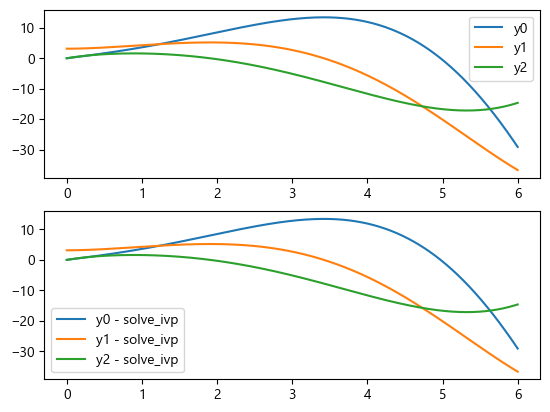

In [55]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

def fvdp(t, y):
    dy1 = y[1]
    dy2 = y[2]
    dy3 = np.cos(t) - y[2] + y[1] - y[0]
    return [dy1, dy2, dy3]


def solution():
    x = np.linspace(0, 6, 1000)
    y0 = [0, np.pi, 0]
    tspan = (0.0, 6.0)
    # 由于传参顺序不一致，所以使用 lambda 表达式来调换顺序
    y = odeint(lambda y, t: fvdp(t, y), y0, x)
    y_ = solve_ivp(fvdp, t_span=tspan, y0=y0, t_eval=x)

    plt.subplot(211)
    (l1,) = plt.plot(x, y[:, 0], label="y0")
    (l2,) = plt.plot(x, y[:, 1], label="y1")
    (l3,) = plt.plot(x, y[:, 2], label="y2")
    plt.legend(handles=[l1, l2, l3])

    plt.subplot(212)
    (l4,) = plt.plot(y_.t, y_.y[0, :], label="y0 - solve_ivp")
    (l5,) = plt.plot(y_.t, y_.y[1, :], label="y1 - solve_ivp")
    (l6,) = plt.plot(y_.t, y_.y[2, :], label="y2 - solve_ivp")
    plt.legend(handles=[l4, l5, l6])

    plt.show()


solution()

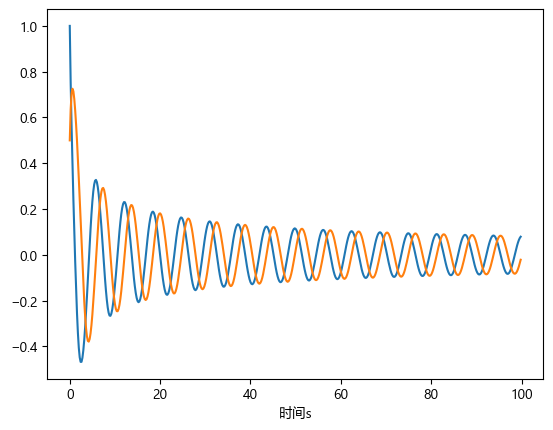

In [56]:
plt.rcParams["font.sans-serif"] = ["Microsoft YaHei"]

def func(t, w):
    x = w[0]
    y = w[1]
    return [-x**3 - y, -y**3 + x]

y0 = [1, 0.5]

yy = solve_ivp(func, (0, 100), y0, method="RK45", t_eval=np.arange(0, 100, 0.2))
t = yy.t
data = yy.y
plt.plot(t, data[0,:])
plt.plot(t, data[1, :])
plt.xlabel("时间s")
plt.show()

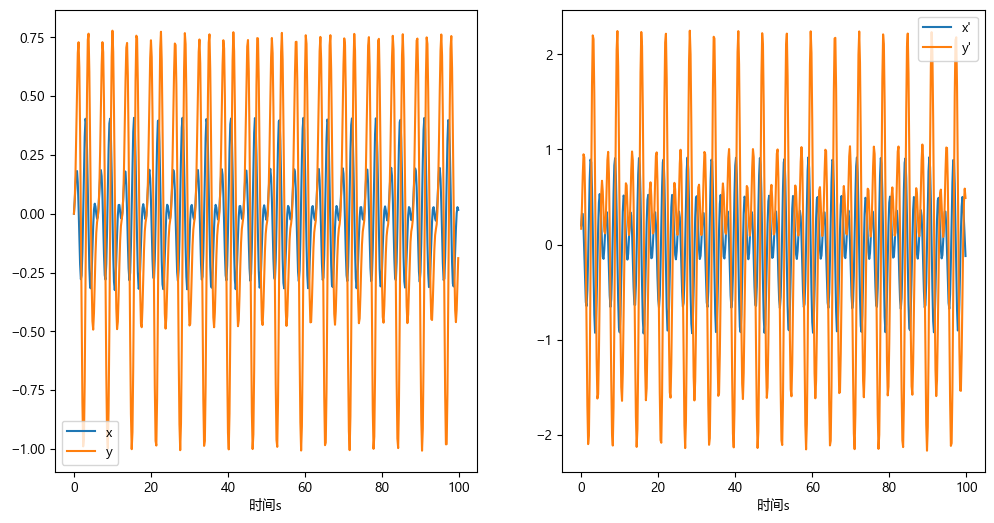

In [57]:
def func(t, w):
    x = w[0]
    y = w[1]
    dx = w[2]
    dy = w[3]
    return [dx, dy, -dy - 3 * x + np.cos(2 * t), 4 * dx - 3 * y + np.sin(2 * t)]


y0 = [0, 0, 1 / 5, 1 / 6]
yy = solve_ivp(func, (0, 100), y0, method="RK45", t_eval=np.arange(0, 100, 0.2))
t = yy.t
data = yy.y
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t, data[0, :])
plt.plot(t, data[1, :])
plt.legend(["x", "y"])
plt.xlabel("时间s")
plt.subplot(1, 2, 2)
plt.plot(t, data[2, :])
plt.plot(t, data[3, :])
plt.legend(["x'", "y'"])
plt.xlabel("时间s")
plt.show()

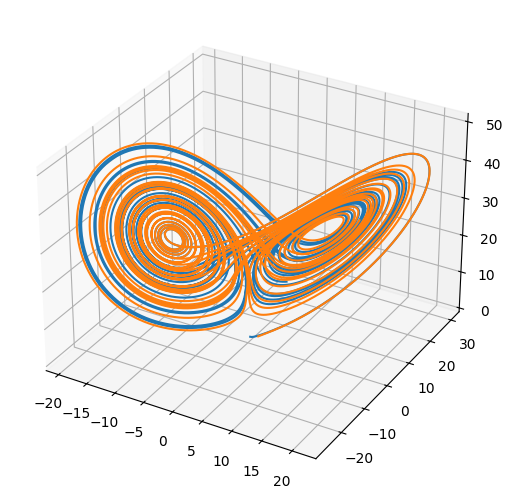

In [18]:
import numpy as np
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


def dmove(Point, t, sets):
    p, r, b = sets
    x, y, z = Point
    return np.array([p * (y - x), x * (r - z), x * y - b * z])


t = np.arange(0, 30, 0.001)
P1 = odeint(dmove, (0.0, 1.0, 0.0), t, args=([10.0, 28.0, 3.0],))
P2 = odeint(dmove, (1.0, 2.0, 0.0), t, args=([10.0, 28.0, 3.0],))

fig = plt.figure()
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot(P1[:, 0], P1[:, 1], P1[:, 2])
ax.plot(P2[:, 0], P2[:, 1], P2[:, 2])
plt.show()

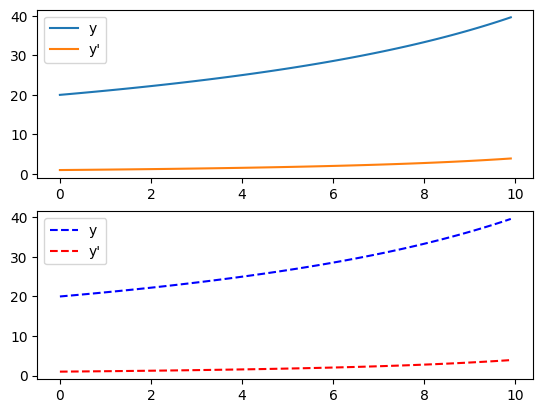

In [12]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt


def func(y, t):
    dy1 = y[1]
    dy2 = 2 * (dy1) ** 2 / y[0]
    return [dy1, dy2]


x = np.arange(0, 10, 0.1)
y = [20, 1]
s = odeint(func, y, x)
s_ = solve_ivp(lambda t, y: func(y, t), y0=y, t_span=(0, 10), t_eval=x)
plt.subplot(211)
plt.plot(x, s[:, 0], label="y")
plt.plot(x, s[:, 1], label="y'")
plt.legend()
plt.subplot(212)
plt.plot(s_.t, s_.y[0, :], "b--", label="y")
plt.plot(s_.t, s_.y[1, :], "r--", label="y'")
plt.legend()
plt.show()